# Assignment 1 281N

## By: Vishwak Venkatesh, Saurabh Arora, Ruchi Sharma, James Anderson, Spoorthi Anupuru

### Forum Used: Mid Size Sedans

### Link:
https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0/p400 


### Scraper

In [82]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [83]:
chrome_driver = 'C:/Users/vishw/Downloads/chromedriver_win32/chromedriver'

chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [181]:
driver = webdriver.Chrome(chrome_driver,options=chrome_options)

In [85]:
import pandas as pd
df = pd.DataFrame(columns=['username', 'date', 'comment'])

In [182]:
df = pd.DataFrame(columns=['username', 'date', 'comment'])

driver.get('https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0/p400')
while len(df) < 5000:
    elements = driver.find_elements(By.CLASS_NAME, "Comment")
    for element in elements:    
        author = element.find_element(By.CLASS_NAME, "Author").text
        date = element.find_element(By.TAG_NAME, "time").text
        comment = element.find_element(By.CLASS_NAME, "Item-Body").find_elements(By.TAG_NAME, 'div')[0].text
        try:
            reply = element.find_elements(By.CLASS_NAME, "blockquote-line")
            reply = '\n'.join([i.text for i in reply])
        except:
            reply = ''
        item = pd.DataFrame([[author, date, comment.replace(reply, '').strip()]], columns=['username', 'date', 'comment'])
        df = pd.concat([df, item], axis = 0, ignore_index = True)
    next_page = driver.find_element(By.CLASS_NAME, "Next").get_attribute('href')
    driver.get(next_page)
#     print(len(df), 'comments scraped')
    
# print(next_page)    

In [183]:
df.to_csv('scraped_data_1.csv')

### Task 0 : Importing and Pre-processing

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import re
import string
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from itertools import compress

In [2]:
text = pd.read_csv('scraped_data_1.csv')
text.shape

(5000, 4)

In [3]:
text.head()

,Unnamed: 0,username,date,comment
0,0,ahightower,January 2014,I count that in the Accord's favor...
1,1,[Deleted User],January 2014,"Yes, but the car is in the way when looking to..."
2,2,[Deleted User],January 2014,"It's winter, and the dealer topped off my wind..."
3,3,akirby,January 2014,Of course you have a blind spot on the left si...
4,4,[Deleted User],January 2014,**\nAre you sure you don't want to talk about ...


### Task A : 
Once you fetch the data, test if the data support Zipf’s law econometrically. Also plot the most 
common 100 words in the data against the theoretical prediction of the law. For this question, do not 
remove stopwords. Also do not perform stemming or lemmatization. 

In [4]:
# Pre-process message texts
text['comment'] = text['comment'].astype(str)
text['comment'] = text['comment'].apply(lambda x: x.lower())
# text['Message'].apply(lambda x: re.findall('(\w+)', x))

In [5]:
# print(string.punctuation)
tokenizer = RegexpTokenizer(r'\w+')
text['Words'] = text['comment'].apply(lambda x: tokenizer.tokenize(x))

In [6]:
text['Words']

0             [i, count, that, in, the, accord, s, favor]
1       [yes, but, the, car, is, in, the, way, when, l...
2       [it, s, winter, and, the, dealer, topped, off,...
3       [of, course, you, have, a, blind, spot, on, th...
4       [are, you, sure, you, don, t, want, to, talk, ...
                              ...                        
4995    [how, much, do, your, new, brake, components, ...
4996    [only, about, 10, lighter, on, these, particul...
4997    [i, made, my, annual, pilgrimage, to, the, gre...
4998    [i, wonder, when, honda, will, show, off, the,...
4999                  [sda, said, this, fall, i, believe]
Name: Words, Length: 5000, dtype: object

In [7]:
# Counter for entire message corpus
# text['Message'].transform(lambda x: ''.join(x))
all_msgs = text['comment'].str.cat(sep = ' ')

In [8]:
word_counts = Counter(tokenizer.tokenize(all_msgs)).most_common()
word_counts[:10]

[('the', 22080),
 ('a', 11367),
 ('i', 10887),
 ('and', 9222),
 ('to', 8506),
 ('it', 6938),
 ('in', 5672),
 ('of', 5638),
 ('is', 5633),
 ('that', 4941)]

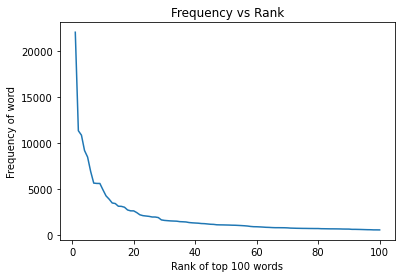

In [9]:
rank = [i for i  in range(1, 101)]
frequency = [i[1] for i in word_counts[:100]]
plt.plot(rank, frequency)
plt.xlabel('Rank of top 100 words')
plt.ylabel('Frequency of word')
plt.title('Frequency vs Rank')
plt.show()

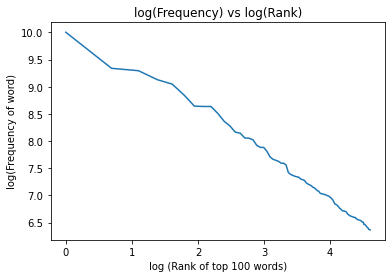

In [10]:
plt.plot(np.log(rank), np.log(frequency))
plt.xlabel('log (Rank of top 100 words)')
plt.ylabel('log(Frequency of word)')
plt.title('log(Frequency) vs log(Rank)')
plt.show()

We have successfully shown the applicability of Zipf's Law through the linear relationship seen between log(word frequency) and log(rank).

### Task B

Find the top 10 brands from frequency counts. You will need to write a script to count the 
frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with 
brands so that from now on you have to deal with only brands and not models. You will need another 
script for this job. A list of model and brand names (not exhaustive) are provided in a separate file.   

We begin by loading in the stop words and appending stop words not present
in the original list. Subsequently, we remove these stop words by use of a lambda expression. 

In [11]:
stopwords_1 = stopwords.words('english')
new_stopwords = ['car',
'cars',                 
'like',
'said',
'one',
'get',
'new',
'would',
'think',
'much',
'also',
'years',
'time',
'sedan',
'problem',
'seat']

stopwords_1.extend(new_stopwords)

In [12]:
# Remove stopwords
text['Cleaned Words'] = text['Words'].apply(lambda x: [word for word in x if word not in stopwords_1])

Here, we load in a csv containing the model and corresponding brands of cars. We do this in order to replace textual occurences of a model with the brand. 

In [13]:
# Import brand - model mapping
brand_map = pd.read_csv('car_brand_model.csv')
brand_map

# We can also append things to this map with the following code. We noticed 
# in the csv that something like 3series is not present in the csv. Instead
# only 3-series is present. Another example would be replacing common
# nicknames of brands with the brand itself. i.e: 'beemer' = 'bmw'
# The code below shows how we can append brand and model combos to the 
# dataframe 'brand_map'

# additional_combos = pd.DataFrame([[bmw, beemer], [bmw, 3series], [volkswagon, vw]] columns=['Brand'],['Model'], index=None)
# brand_map.append(additional_combos)

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx
...,...,...
525,volvo,xc90
526,volvo,s60
527,volvo,s80
528,volvo,v60


In [14]:
# Create mapping dictionary
brand_map_dict = brand_map.set_index('Model').to_dict().values()
brand_map_dict = dict(ele for sub in brand_map.set_index('Model').to_dict().values() for ele in sub.items())
brand_map_dict

{'integra': 'acura',
 'legend': 'honda',
 'vigor': 'acura',
 'rlx': 'acura',
 'ilx': 'acura',
 'mdx': 'acura',
 'rdx': 'acura',
 'tsx': 'acura',
 'rsx': 'acura',
 'quattro': 'audi',
 'a4': 'audi',
 'a6': 'audi',
 'a5': 'audi',
 'a7': 'audi',
 'q3': 'audi',
 'q5': 'audi',
 'q7': 'audi',
 'a8': 'audi',
 'a3': 'audi',
 '3-series': 'bmw',
 '5-series': 'bmw',
 '6-series': 'bmw',
 '4-series': 'bmw',
 'xdrive': 'bmw',
 'alpina': 'bmw',
 '330ci': 'bmw',
 '328i': 'bmw',
 '330c': 'bmw',
 '335i': 'bmw',
 '335d': 'bmw',
 '528i': 'bmw',
 '535i': 'bmw',
 '128i': 'bmw',
 '640i': 'bmw',
 '3er': 'bmw',
 '5er': 'bmw',
 'm5': 'bmw',
 'm3': 'bmw',
 'm6': 'bmw',
 'bmws': 'bmw',
 'bmwesque': 'bmw',
 'park avenue': 'buick',
 'la crosse': 'buick',
 'lacrosse': 'buick',
 'century': 'toyota',
 'enclave': 'buick',
 'encore': 'buick',
 'regal': 'buick',
 'buicks': 'buick',
 'escalade': 'cadillac',
 'srx': 'cadillac',
 'xts': 'cadillac',
 'cars': 'car',
 'grand blazer': 'chevrolet',
 'trailblazer': 'chevrolet',
 '

In [15]:
# Replace models with brands
text['Mapped Words'] = text['Cleaned Words'].apply(lambda x: [brand_map_dict.get(i, i) for i in x])
text['Mapped Words']

0                                   [count, honda, favor]
1       [yes, way, looking, right, looking, left, blin...
2       [winter, dealer, topped, windshield, washer, f...
3       [course, blind, spot, left, side, blind, spots...
4       [sure, want, talk, blind, spots, honda, sport,...
                              ...                        
4995    [brake, components, weigh, compared, oem, brak...
4996    [10, lighter, particular, rotors, definitely, ...
4997    [made, annual, pilgrimage, greater, twin, citi...
4998                     [wonder, honda, show, 18, honda]
4999                                 [sda, fall, believe]
Name: Mapped Words, Length: 5000, dtype: object

In [16]:
# If a brand is repeated more than once in a list, it will not be counted
# twice because we are only searching for existence in the list, not total 
# counts. 

In [17]:
# Most common words outside of stop words
brand_text = text['Mapped Words'].apply(lambda x: ' '.join([i for i in set(x)])).str.cat(sep = ' ')
brand_word_counts = Counter(tokenizer.tokenize(brand_text)).most_common()
brand_word_counts[:50]

[('honda', 1382),
 ('ford', 919),
 ('good', 760),
 ('2', 718),
 ('toyota', 715),
 ('hyundai', 652),
 ('6', 626),
 ('mazda', 623),
 ('3', 591),
 ('kia', 585),
 ('really', 582),
 ('better', 581),
 ('still', 576),
 ('even', 557),
 ('back', 553),
 ('well', 548),
 ('drive', 525),
 ('5', 523),
 ('4', 513),
 ('lot', 489),
 ('see', 478),
 ('year', 471),
 ('know', 471),
 ('nissan', 467),
 ('mpg', 443),
 ('model', 441),
 ('way', 438),
 ('going', 436),
 ('1', 434),
 ('got', 422),
 ('go', 416),
 ('could', 410),
 ('great', 400),
 ('chevrolet', 395),
 ('nice', 393),
 ('last', 386),
 ('driving', 382),
 ('midsize', 378),
 ('look', 373),
 ('engine', 361),
 ('want', 357),
 ('right', 356),
 ('many', 356),
 ('probably', 351),
 ('make', 350),
 ('subaru', 344),
 ('buy', 342),
 ('2015', 340),
 ('best', 339),
 ('people', 339)]

### Top 10 brands

In [18]:
# Get top 10 brands
brand_map_mask = [i in brand_map_dict.values() for i in [i[0] for i in brand_word_counts]]
top_10 = list(compress(brand_word_counts, brand_map_mask))[:10]
top_10

[('honda', 1382),
 ('ford', 919),
 ('toyota', 715),
 ('hyundai', 652),
 ('mazda', 623),
 ('kia', 585),
 ('nissan', 467),
 ('chevrolet', 395),
 ('subaru', 344),
 ('chrysler', 256)]

In [19]:
# Residuals: (any brands/models we missed?)
[i for i in brand_word_counts if i[0] not in brand_map_dict.values()]

[('good', 760),
 ('2', 718),
 ('6', 626),
 ('3', 591),
 ('really', 582),
 ('better', 581),
 ('still', 576),
 ('even', 557),
 ('back', 553),
 ('well', 548),
 ('drive', 525),
 ('5', 523),
 ('4', 513),
 ('lot', 489),
 ('see', 478),
 ('year', 471),
 ('know', 471),
 ('mpg', 443),
 ('model', 441),
 ('way', 438),
 ('going', 436),
 ('1', 434),
 ('got', 422),
 ('go', 416),
 ('could', 410),
 ('great', 400),
 ('nice', 393),
 ('last', 386),
 ('driving', 382),
 ('midsize', 378),
 ('look', 373),
 ('engine', 361),
 ('want', 357),
 ('right', 356),
 ('many', 356),
 ('probably', 351),
 ('make', 350),
 ('buy', 342),
 ('2015', 340),
 ('best', 339),
 ('people', 339),
 ('looks', 333),
 ('price', 333),
 ('looking', 332),
 ('pretty', 331),
 ('miles', 331),
 ('sure', 326),
 ('big', 322),
 ('vehicle', 317),
 ('interior', 317),
 ('maybe', 311),
 ('though', 310),
 ('10', 304),
 ('less', 303),
 ('never', 302),
 ('sales', 300),
 ('used', 299),
 ('first', 298),
 ('something', 295),
 ('mid', 293),
 ('long', 291),
 ('

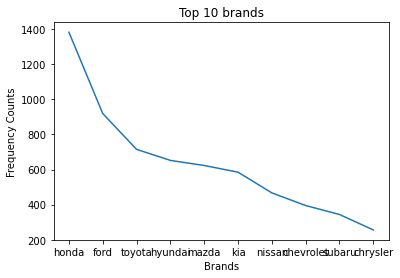

In [20]:
# Plot it
top_10_brands = [i[0] for i in top_10]
top_10_counts = [i[1] for i in top_10]
plt.plot(top_10_brands, top_10_counts)
plt.xlabel('Brands')
plt.ylabel('Frequency Counts')
plt.title('Top 10 brands')
plt.show()

### Task C


Task C: Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have 
to write a script to do this task). For lift calculations, be sure not to count a mention more than once 
per post, even if it is mentioned multiple times in the post.

In [21]:
# Lift calculations
N = len(text['Mapped Words'])

lift_matrix_orig = np.empty(shape = (len(top_10_brands), len(top_10_brands)))
lift_matrix_orig

array([[10.0024275 ,  9.3384697 ,  9.2953247 ,  9.12934721,  9.04852708,
         8.84476883,  8.64329707,  8.63728467,  8.63639744,  8.50532302],
       [ 8.36240898,  8.27664913,  8.16451027,  8.14641932,  8.0580108 ,
         8.05325115,  8.02256895,  7.92044651,  7.88457651,  7.88306935],
       [ 7.80954132,  7.7088596 ,  7.66575343,  7.64683139,  7.62803113,
         7.59438124,  7.59287029,  7.56268125,  7.42177579,  7.38770924],
       [ 7.37023064,  7.35308192,  7.34342623,  7.33432935,  7.30114781,
         7.29029288,  7.27724773,  7.23345542,  7.21081845,  7.19518732],
       [ 7.1808312 ,  7.15148546,  7.14124512,  7.11476945,  7.08757371,
         7.07580886,  7.03966035,  7.03085748,  7.02731451,  7.01929665],
       [ 7.01211529,  6.99942247,  6.99301512,  6.97821374,  6.96034773,
         6.94022247,  6.91274282,  6.86693328,  6.83733281,  6.83087423],
       [ 6.8134446 ,  6.79234443,  6.76503898,  6.75227038,  6.72982407,
         6.71538339,  6.71538339,  6.71052311

In [22]:
for i, word_a in enumerate(top_10_brands):
    for j, word_b in enumerate(top_10_brands):
        N_a = sum(text['Mapped Words'].apply(lambda x: word_a in x))
        N_b = sum(text['Mapped Words'].apply(lambda x: word_b in x))
        N_ab = sum(text['Mapped Words'].apply(lambda x: (word_a in x) & (word_b in x)))
        if (N_a * N_b) == 0:
            lift_matrix_orig[i, j] = 0
        else:
            lift_matrix_orig[i, j] = (N * N_ab)/(N_a * N_b)

lift_matrix_orig            
lift_matrix = np.triu(lift_matrix_orig, k = 1)

In [23]:
lift_matrix = lift_matrix.round(2)
lift = lift_matrix.copy()
lift = lift.astype('object')

In [24]:
#getting the top half and removing the lower
for i in range(len(lift[0,:])):
    for j in range(len(lift[:,0])):
               if i>=j:
                 lift[i,j] = ' '

### Lift Values for Top 10 brands

In [25]:
lift = pd.DataFrame(lift)
lift_df = lift
lift_df.columns = top_10_brands
lift_df.index = lift_df.columns
lift_df

,honda,ford,toyota,hyundai,mazda,kia,nissan,chevrolet,subaru,chrysler
honda,,1.36,2.12,1.69,1.86,1.45,2.14,1.64,1.77,1.87
ford,,,1.93,1.7,1.49,1.64,1.97,2.11,1.79,1.57
toyota,,,,2.69,2.28,2.0,3.26,2.66,2.97,1.8
hyundai,,,,,2.08,4.25,2.79,2.68,2.74,1.77
mazda,,,,,,1.91,2.44,2.28,2.78,1.79
kia,,,,,,,2.15,2.45,1.62,2.61
nissan,,,,,,,,3.09,2.61,2.05
chevrolet,,,,,,,,,2.83,2.18
subaru,,,,,,,,,,1.48
chrysler,,,,,,,,,,


### Task D

Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there 
are multiple scripts available on GitHub). 

In [26]:
dissimilarity_matrix = 1/lift_matrix_orig.round(2)
np.fill_diagonal(dissimilarity_matrix,0)


### MDS MAP

C:\Users\sauar\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


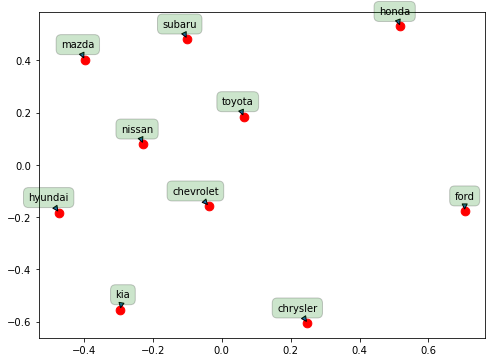

In [27]:
# MDS plot
# fig, ax = plt.subplots()
# ax.scatter(x_2d[:,0], x_2d[:,1])

from sklearn import manifold
from sklearn.manifold import MDS
mds=manifold.MDS(n_components=2, random_state=10)
results=mds.fit(dissimilarity_matrix)
coordinates=results.embedding_


x = coordinates[:,0]
y = coordinates[:,1]
plt.figure(figsize=(8,6))
plt.scatter(x,y, marker='o', color='red', s=75)
top_10_brands = [i[0] for i in top_10]

for brand, x_coord, y_coord in zip(top_10_brands, x, y):
    plt.annotate(text=brand, xy=(x_coord,y_coord),xytext = (10, 10),textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
    arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=0'))
    
plt.show()

### Task E

What insights can you offer to your client from your analyses in Tasks C and D 

### Answer:

Task C Insights: We posit that insights exist for high/low lift values. We also look for trends in terms of average lift value for particular brands. 
Kia and Hyundai hold the highest lift at 4.25. Toyota and Nissan hold the second highest lift at 3.26. These results are expected. Hyundai is the parent company of Kia, and the two brands often use the same chasses for their vehicles. Their relation indicated by the lift is thus predictable. Toyota and Nissan are both Japanese car manufacturers; and generally speaking, the competitive decisions for geographically-close manufacturers will often be correlated. Thus, their high lift value is not shocking. 
Another peculiar observation involves the average lift values. We notice Ford, Honda, and Chrysler have lower lift values on average. This implies a greater propensity to be mentioned exclusively without the other brands. One possible explanation for this is that the customers of these brands are typically loyal and dont feel the need to compare their brand with another brand. 
That being said, none of the brands have low lift values; we conclude that the midsize sedan market is competitive; where no brand appears to have created their own niche. 

Task D Insights: 
There are two ways of interpreting this MDS plot. One may originally draw the conclusion that the inability to draw distinct clusters shows that the brands have developed exclusive niches in the mid size sedan market. However, when analyzing the lift values, we see that this is far from the truth. The "spread-out" characteristic of the MDS plot is not because the brands aren't related to eachother, it is actually because they are all (with some exception), in competition with eachother. Honda, Ford, and Chrysler, as seen in the lift values, are generally compared less to other brands. 

### Task F

What are 5 most frequently mentioned attributes or features of cars in the discussions? 
Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do 
a sentiment analysis for this assignment.

In [28]:
# Frequently mentioned attributes keywords
# 1. mpg, miles, mileage, efficiency, efficient - Fuel efficiency
# 2. speed, power, fast, powerful, performance, mph, acceleration - Engine Power
# 3. looks, looking, elegance, elegant, luxury, luxurious, beautiful, stylish, style - Looks
# 4. price, cost, cheap, prices, finance, financing, expensive, costly, - Cost
# 5. safe, safety, family, reliable, reliability, comfortable, maintenance, maintain - Safety

In [29]:
attribute_map = pd.read_csv('attribute_map.csv')
attribute_map_dict = attribute_map.set_index('Attribute').to_dict().values()
k = [i for i in attribute_map_dict]

In [30]:
attribute_map_dict = k[0]
attribute_map_dict

{'mpg': 'Fuel Efficiency',
 'miles': 'Fuel Efficiency',
 'mileage': 'Fuel Efficiency',
 'efficiency': 'Fuel Efficiency',
 'efficient': 'Fuel Efficiency',
 'speed': 'Engine Power',
 'power': 'Engine Power',
 'fast': 'Engine Power',
 'powerful': 'Engine Power',
 'performance': 'Engine Power',
 'mph': 'Engine Power',
 'acceleration': 'Engine Power',
 'looks': 'Looks',
 'looking': 'Looks',
 'elegance': 'Looks',
 'elegant': 'Looks',
 'luxury': 'Looks',
 'luxurious': 'Looks',
 'beautiful': 'Looks',
 'stylish': 'Looks',
 'style': 'Looks',
 'price': 'Cost',
 'cost': 'Cost',
 'cheap': 'Cost',
 'prices': 'Cost',
 'finance': 'Cost',
 'financing': 'Cost',
 'expensive': 'Cost',
 'costly': 'Cost',
 'safe': 'Safety',
 'safety': 'Safety',
 'family': 'Safety',
 'reliable': 'Safety',
 'reliability': 'Safety',
 'comfortable': 'Safety',
 'maintenance': 'Safety',
 'maintain': 'Safety'}

In [31]:
brand_word_counts_df = pd.DataFrame(brand_word_counts, columns = ['Word','Frequency'])
brand_word_counts_df['Tag'] = brand_word_counts_df['Word'].apply(lambda x: attribute_map_dict.get(x))

### Top 5 Attributes

In [32]:
brand_word_counts_df.groupby('Tag')['Frequency'].sum()

Tag
Cost               871
Engine Power       916
Fuel Efficiency    992
Looks              882
Safety             609
Name: Frequency, dtype: int64

In [33]:
# Replace models with brands
text['Attributes'] = text['Cleaned Words'].apply(lambda x: set([attribute_map_dict.get(i) for i in x]))
text['Attributes']

0                                             {None}
1                                      {Looks, None}
2                                             {None}
3                                             {None}
4       {Looks, Fuel Efficiency, Engine Power, None}
                            ...                     
4995                                          {None}
4996                                          {None}
4997                                   {Looks, None}
4998                                          {None}
4999                                          {None}
Name: Attributes, Length: 5000, dtype: object

In [34]:
list(set(attribute_map_dict.values()))

['Looks', 'Engine Power', 'Cost', 'Fuel Efficiency', 'Safety']

In [35]:
# Lift calculations
N = len(text['Attributes'])
top_10_brands = [i[0] for i in top_10]

attr_lift_matrix_orig = np.empty(shape = (len(list(set(attribute_map_dict.values()))), len(top_10_brands)))
attr_lift_matrix_orig

array([[2.41207262e-310, 1.95690452e-310, 1.47224068e-310,
        1.19638123e-310, 1.04847812e-310, 8.34156546e-311,
        7.32300748e-311, 6.67155477e-311, 5.84185441e-311,
        5.62753284e-311],
       [4.72780662e-311, 4.44345919e-311, 4.21640564e-311,
        4.08484190e-311, 3.42914520e-311, 3.31243543e-311,
        3.25089755e-311, 3.11084583e-311, 2.93896417e-311,
        2.82862039e-311],
       [2.70766663e-311, 2.61005482e-311, 2.51032102e-311,
        2.39997724e-311, 2.37239129e-311, 2.32570739e-311,
        2.27690148e-311, 2.19202165e-311, 2.03711596e-311,
        1.96496810e-311],
       [1.89069825e-311, 1.81642840e-311, 1.75064653e-311,
        1.74215854e-311, 1.70820661e-311, 1.63393676e-311,
        1.59998483e-311, 1.58088686e-311, 1.55966691e-311,
        1.55330092e-311],
       [1.50661701e-311, 1.48115306e-311, 1.47266508e-311,
        1.43871315e-311, 1.42598117e-311, 1.36656529e-311,
        1.33261336e-311, 1.28805145e-311, 1.24561153e-311,
        1.2

In [36]:
# set(attribute_map_dict.values())
# top_10_brands
# attribute_map_dict
# text['Mapped Words'].apply(lambda x: 'cost' in x)
# print(sum(text['Attributes'].apply(lambda x: word_a in x)))

In [37]:
for i, word_a in enumerate(list(set(attribute_map_dict.values()))):
    for j, word_b in enumerate(top_10_brands):
        N_a = sum(text['Attributes'].apply(lambda x: word_a in x))
        N_b = sum(text['Mapped Words'].apply(lambda x: word_b in x))
        N_ab = sum(text['Attributes'].apply(lambda x: word_a in x) &\
                   text['Mapped Words'].apply(lambda x: word_b in x))
        if (N_a * N_b) == 0:
            attr_lift_matrix_orig[i, j] = 0
        else:
            attr_lift_matrix_orig[i, j] = (N * N_ab)/(N_a * N_b)

attr_lift_matrix_orig            
# lift_matrix = np.triu(lift_matrix_orig, k = 1)

array([[1.35733969, 1.41707747, 1.49108651, 1.54202164, 1.53798498,
        2.08198506, 1.37264591, 1.70826287, 1.6280639 , 1.76598347],
       [1.44514259, 1.39269585, 1.22943161, 1.53158517, 1.51257583,
        2.09140485, 1.20468502, 1.29964927, 1.55365846, 2.11519866],
       [1.40946006, 1.25382304, 1.50603854, 1.48324876, 1.39816411,
        1.47882979, 1.43930115, 0.90291886, 1.39566785, 1.87542867],
       [1.5550422 , 1.25710501, 1.07718369, 1.48611058, 1.16646561,
        1.38539334, 1.1704151 , 1.13216448, 1.91391015, 1.16459627],
       [1.49827112, 1.54706825, 1.89505151, 1.85863813, 1.74604536,
        2.09285167, 1.38941105, 1.37694463, 1.96942127, 2.05003578]])

In [38]:
attr_lift_df = pd.DataFrame(attr_lift_matrix_orig.round(2), index = list(set(attribute_map_dict.values())), columns = top_10_brands)
attr_lift_df

,honda,ford,toyota,hyundai,mazda,kia,nissan,chevrolet,subaru,chrysler
Looks,1.36,1.42,1.49,1.54,1.54,2.08,1.37,1.71,1.63,1.77
Engine Power,1.45,1.39,1.23,1.53,1.51,2.09,1.20,1.30,1.55,2.12
Cost,1.41,1.25,1.51,1.48,1.40,1.48,1.44,0.90,1.40,1.88
Fuel Efficiency,1.56,1.26,1.08,1.49,1.17,1.39,1.17,1.13,1.91,1.16
Safety,1.50,1.55,1.90,1.86,1.75,2.09,1.39,1.38,1.97,2.05


### Task G

What advice will you give to your client from Task F? For this assignment, you can assume 
that all sentiments are positive. 

<AxesSubplot:>

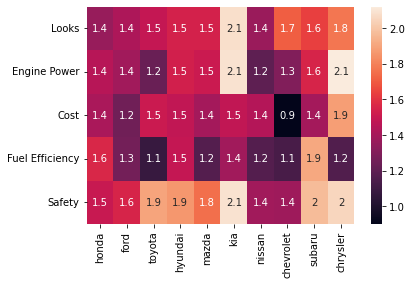

In [39]:
import seaborn as sns
sns.heatmap(attr_lift_df, annot=True)

### Answer

Note: Because sentiment analysis was not performed, we do not know whether the associative attributes for each brand reflect a positive or negative image of the brand in question. 

That being said, there are some predominant attributes associated with each of the brands. 
Honda: All 5 attributes appear to be talked about equally. This may indicate Honda is relevant to each niche (each niche being characterized by an attribute) of the midsize sedan market. The lift values do have a lower magnitude however, so we conclude that if Honda is marketing to each of the attributes, their resonance may not be high, comparatively speaking. 
Ford: The same trends are seen in Honda, slightly lower lift values.
Toyota: Toyota experiences a similar trend to the aforementioned brands, but users often talk about safety while less about fuel efficiency. 
Hyundai: Similar trend to the aforementioned brands, but users talk about safety more. 
Mazda: Similar trend to the aforementioned brands, but users talk about safety more. 
Kia: Kia holds particularly high lift with three of the attributes, looks, engine power, and safety. One explanation for this would be a slightly higher resonance for this particular brand. 
Nissan: Similar trends to Ford, lower lift values. 
Chevrolet: The spectrum of lift values is much more widespread for Chevy; with cost often not being talked about but while looks are often mentioned when talking about Chevy. 
Subaru: Subaru holds higher than average lift values for most categories, with many users speaking on fuel efficiency and safety when also mentioning Subaru. 
Chrysler: Chrysler has particularly high lift values as well, (potentially explained by resonance), but fuel efficiency is often not talked about with Chrysler. 

### Task H
Which is the most aspirational brand in your data in terms of people actually wanting to buy 
or own? Describe your analysis. What are the business implications for this brand?

In [40]:
df_comments = text.copy()

In [41]:
from nltk.util import ngrams
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set( stopwords.words('english') + list(punctuation))
punctuations = set(list(punctuation))
def create_bigrams(comments):
    tokens = word_tokenize(comments)
    filtered_words = [word.lower() for word in tokens if word not in punctuations]
    bigram = list(ngrams(filtered_words, 2))
    return list(set(bigram))
  
df_comments['Bigram list'] = df_comments['comment'].map(create_bigrams)

In [42]:
aspiration_bigram = [('love', 'to'),
('would', 'love'),
('would', 'hope'),
('hope', 'to'),
('wish', 'to'),
('wish', 'that'),
('wish', 'for'),
('wishing', 'for'),
('want', 'to'),
('wants', 'to'),
('dream', 'of'),
('daydreaming', 'about'),
('dream', 'to'),
('desire', 'for'),
('desire', 'to'),
('everyone', 'desires'),
('future', 'car'),
('near', 'future'),
('future', 'vehicle'),
('to', 'buy'),
('buy', 'the'),
('buy', 'it'),
('can', 'buy'),
('would', 'buy'),
('will', 'buy'),
('will', 'buy'),
('could', 'buy'),
('buy', 'cars'),
('buy', 'new'),
('may', 'buy'),
('to', 'purchase'),
('purchase', 'the'),
('purchase', 'it'),
('purchase', 'cars'),
('possible', 'purchase'),
('will', 'purchase'),
('next', 'purchase'),
('like', 'to'),
('will', 'get'),
('could', 'get'),
('I', 'wish'),
('can', 'get')]

In [43]:
# Getting the aspiration counts from the user comments
def aspiration_count(comment):
      for i in range(len(comment)):
        if comment[i] in aspiration_bigram:
            return 1
            break

In [44]:
df_comments['aspirations'] = df_comments['Bigram list'].map(aspiration_count)
df_comments['aspirations'].fillna(0, inplace=True)

In [45]:
#code adjustments while compiling
top10brands = []
for i in range(len(top_10)):
    top10brands.append(top_10[i][0])

In [46]:
for brand in top10brands:
    df_comments[brand] = df_comments['Mapped Words'].map(lambda x: 1 if brand in x else 0)

In [47]:
#code adjustments while compiling
asp = df_comments['aspirations']
df_comments.drop('aspirations',axis =1,inplace = True)
df_comments['aspirations'] = asp

In [48]:
# Creating the lift matrix
aspirations = df_comments.iloc[ :, -1:].columns.values
aspiration_matrix = pd.DataFrame(index=top10brands, columns=aspirations)

In [49]:
for brand in top10brands:
    freq_brand = df_comments[brand].sum()
    freq_aspiration = df_comments['aspirations'].sum()
    freq_both = df_comments[aspirations][(df_comments[brand] == 1) & (df_comments['aspirations'] == 1 )].sum()
    lift = len(df_comments) * freq_both / (freq_brand * freq_aspiration)
    aspiration_matrix.loc[brand] = lift

In [50]:
aspiration_matrix.sort_values(by = 'aspirations', ascending= False)

,aspirations
kia,2.037817
subaru,1.738391
mazda,1.719789
chrysler,1.654641
toyota,1.649513
hyundai,1.541386
nissan,1.458379
honda,1.44237
chevrolet,1.219563
ford,1.202014


### Insights:
### Methodology: 
We made a list of probable aspirational phrases - bigrams [ 'would love', 'hope to', etc.], which are being used by the users to convey their aspirations to buy a particular brand of car. We calculated the aspirations count for each comment (set as 1 if the comment had mentions of 1 or more aspirational phrases from the list). Then, we calculated the asscoiations between the top 10 brands and the aspirational words by calculating their lift.

### Results and Recommendations: 
As we can observe from the lift ratios between brands and aspirations, Kia seems to be the most aspirational brand and people are showing interest in buying Kia cars. Our advice to the managers would be to prepare for the forecasted demands and manufacture accordingly. This should lead to higher revenues and profits for Kia. The product managers of Kia can also try to check what attributes of the cars are making people want to buy them and the advertising managers can advertise more on those attributes to acquire more customers.

On the other hand, brands with lower lift scores like ford should be concerned since their low lift scores means that people are not aspiring to own their brands. Product managers can try to introduce new features which may bring a change. Advertising managers can try to market the important attributes in such a way that it changes people's perceptions towards the brands.